<a href="https://colab.research.google.com/github/JamesLeeeeeee/ecademy/blob/master/20211105_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#출근시간대 사람들이 가장 많이타고 내리는 역은 어디일까요?
#지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까요?

In [1]:
from google.colab import drive
import csv

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
f=open('/content/gdrive/MyDrive/subwaytime.csv', encoding= 'cp949')

In [17]:
data=csv.reader(f)
header=next(data)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

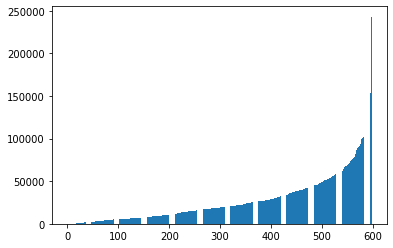

In [20]:
f=open('/content/gdrive/MyDrive/subwaytime.csv', encoding= 'cp949')
data=csv.reader(f)
header=next(data)
header=next(data)
result=[]
for row in data:
  row[4:]=map(int,row[4:])
  result.append(row[10])

print(len(result))
print(result)
result.sort() # 오름차순으로 정렬
import matplotlib.pyplot as plt
plt.bar(range(len(result)), result)
plt.show()
f.close()

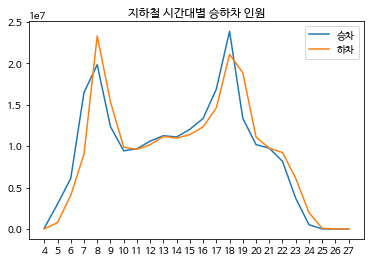

In [4]:
#시간대별 승하차 인원
f=open('/content/gdrive/MyDrive/subwaytime.csv', encoding= 'cp949')
data=csv.reader(f)
header=next(data)
header=next(data)
in_ = [0] * 24
out_ = [0] * 24
    
for row in data:
    row[4:] = map(lambda x:x.replace(',',''), row[4:])
    row[4:] = map(int, row[4:])
    for i in range(24):
        in_[i] += row[4+i*2]
        out_[i] += row[5+i*2]
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.title('지하철 시간대별 승하차 인원')
plt.plot(in_, label='승차')
plt.plot(out_, label='하차')
plt.legend()
plt.xticks(range(24), range(4, 28))
plt.show()
f.close()

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,499 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

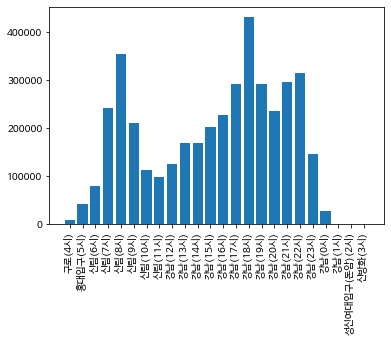

In [7]:
#시간대별 하차인원
f=open('/content/gdrive/MyDrive/subwaytime.csv', encoding= 'cp949')
data=csv.reader(f)
header=next(data)
header=next(data)
mx = [0] * 24 # 시간대별 최대 승차 인원 저장 리스트 초기화
station = [''] * 24 # 시간대별 최대 승차 인원 역이름 저장 리스트 초기화
for row in data:
    row[4:] = map(lambda x:x.replace(',',''), row[4:])
    row[4:] = map(int, row[4:])
    for j in range(24):
        a = row[j*2 + 4] # j와 인덱스번호i 사이의 관계식 사용
        if a > mx[j]:
            mx[j] = a
            station[j] = f'{row[3]}({(j+4)%24}시)'

plt.rc('font', family='NanumBarunGothic')
plt.bar(range(24), mx)
plt.xticks(range(24), station, rotation=90)
plt.show()